In [18]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [19]:
#df = pd.read_csv("data/datosFinales/df_modelos.csv", sep = ";")
df = pd.read_csv("data/datosFinales/diferencias_propagated.csv", sep = ";")

df = df.loc[:, ~df.columns.str.endswith('_5')]
df = df.loc[:, ~df.columns.str.endswith('_4')]
df = df.loc[:, ~df.columns.str.endswith('_3')]
df = df.loc[:, ~df.columns.str.endswith('_2')]




In [20]:
umbral = 0.90  # 95%

columnas_validas = df.columns[df.notna().mean() >= umbral]
df_filtrado = df[columnas_validas]
#drop rows with nans
df_filtrado = df_filtrado.dropna()

In [21]:
# drop 'fuga' column
labels = df_filtrado['fuga']
features = df_filtrado.select_dtypes(include=['float64']) 

In [22]:
df_filtrado.shape

(645, 95)

In [23]:
#imps = ["perdida_sang", "il6_2", "il6_diferencia_2", "neutrofilos_diferencia_2", "linfocitos_1", "pcr_1", "neutrofilos_diferencia_0", 
#        "linfocitos_2", "pcr_0", "tipo_cirugia", "pcr_2", "pcr_diferencia_2", "frec_card_1", "localizacion"]
#features = df.select_dtypes(include=['float64'])  # Ajusta según tu caso

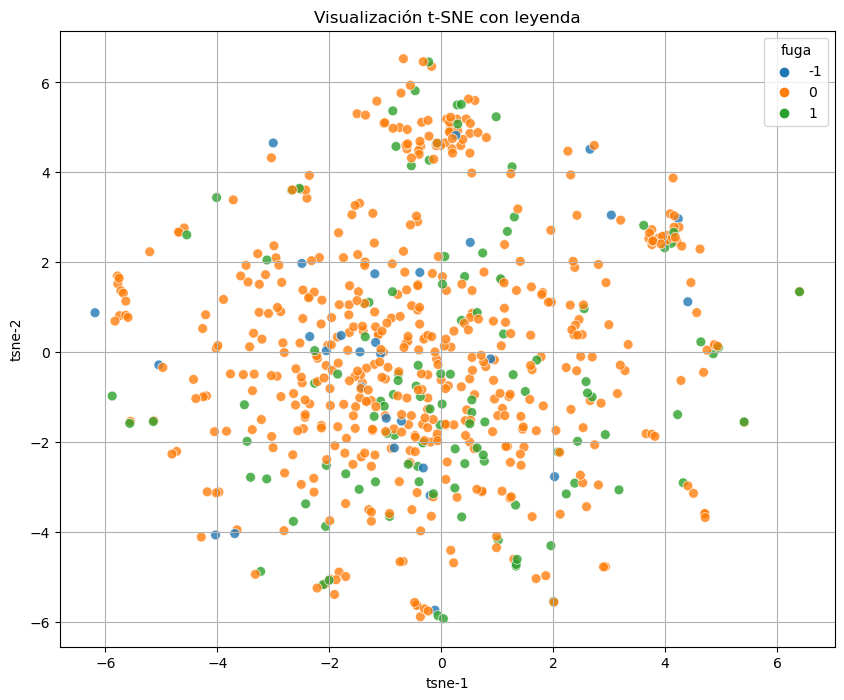

In [24]:
import seaborn as sns

tsne = TSNE(n_components=2, perplexity=100, random_state=42)

# 2. Escala los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

X_tsne = tsne.fit_transform(X_scaled)

tsne_df = pd.DataFrame()
tsne_df['tsne-1'] = X_tsne[:, 0]
tsne_df['tsne-2'] = X_tsne[:, 1]
tsne_df['fuga'] = labels.values

# Graficar con seaborn (con leyenda)
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='tsne-1',
    y='tsne-2',
    hue='fuga',
    palette='tab10',
    data=tsne_df,
    s=50,
    alpha=0.8
)
plt.title('Visualización t-SNE con leyenda')
plt.legend(title='fuga')
plt.grid(True)
plt.show()

In [25]:
import umap
from sklearn.datasets import load_digits
import numpy as np

NameError: name '_C' is not defined

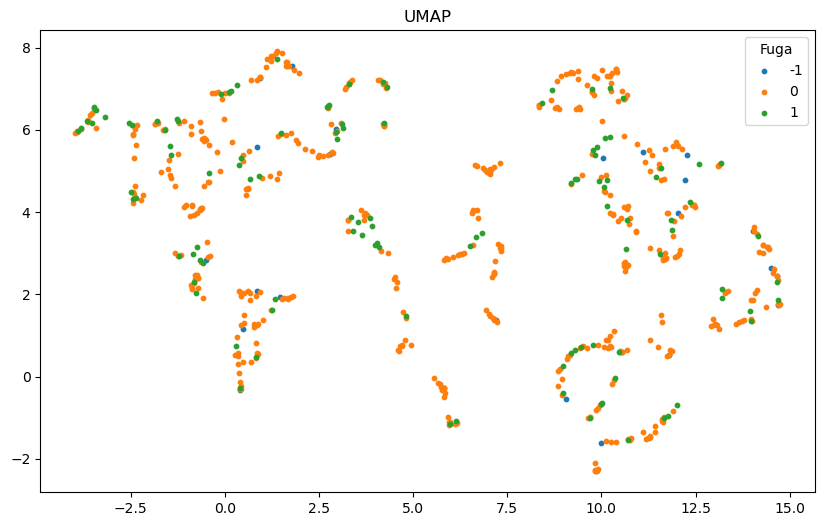

In [ ]:
X = features
y = labels

reductor = umap.UMAP(n_neighbors=5, min_dist=0.1, metric='euclidean')
X_reduced = reductor.fit_transform(X)

# Crear el gráfico con una leyenda por clase
plt.figure(figsize=(10, 6))
for clase in np.unique(y):
    idx = y == clase
    plt.scatter(X_reduced[idx, 0], X_reduced[idx, 1],
                label=str(clase), s=10)

plt.title('UMAP')
plt.legend(title="Fuga")
plt.show()
plt.show()